In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv("/Users/cmdb/data/aau1043_dnm.tsv")
df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df_age = pd.read_csv("/Users/cmdb/data/aau1043_parental_age.tsv")
df_age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [4]:
pat_dnm = df["Phase_combined"] == "father"
mat_dnm = df["Phase_combined"] == "mother"
tot_dnm = df['Proband_id'].value_counts()

In [5]:
mat = (df['Proband_id'][df['Phase_combined']=='mother'].value_counts())
pat = (df['Proband_id'][df['Phase_combined']=='father'].value_counts())
totals = (df['Proband_id'].value_counts())
probands = (df['Proband_id'].value_counts)

In [6]:
tot_4 = pd.DataFrame(df['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='tot_dnm'))
mat_4 = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='mother'].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm'))
pat_4 = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='father'].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm'))
new_df = pd.DataFrame.merge(tot_4, mat_4, on ='Proband_id')
new_df_2 = pd.DataFrame.merge(new_df, pat_4, on ='Proband_id')
new_df_2

,Proband_id,tot_dnm,mat_dnm,pat_dnm
0,91410,122,10,111
1,114094,121,22,98
2,111288,115,21,93
3,8147,114,27,78
4,88246,113,25,87
...,...,...,...,...
391,121087,37,1,36
392,62630,34,5,28
393,76504,34,5,27
394,37789,34,3,17


In [7]:
new_df = pd.DataFrame.merge(tot_4, mat_4, on ='Proband_id')
new_df

,Proband_id,tot_dnm,mat_dnm
0,91410,122,10
1,114094,121,22
2,111288,115,21
3,8147,114,27
4,88246,113,25
...,...,...,...
391,121087,37,1
392,62630,34,5
393,76504,34,5
394,37789,34,3


In [8]:
new_df_2 = pd.DataFrame.merge(new_df, pat_4, on ='Proband_id')
new_df_2

,Proband_id,tot_dnm,mat_dnm,pat_dnm
0,91410,122,10,111
1,114094,121,22,98
2,111288,115,21,93
3,8147,114,27,78
4,88246,113,25,87
...,...,...,...,...
391,121087,37,1,36
392,62630,34,5,28
393,76504,34,5,27
394,37789,34,3,17


In [9]:
new_df_3 = pd.DataFrame.merge(new_df_2, df_age, on ='Proband_id')
new_df_3

,Proband_id,tot_dnm,mat_dnm,pat_dnm,Father_age,Mother_age
0,91410,122,10,111,51,34
1,114094,121,22,98,51,44
2,111288,115,21,93,53,44
3,8147,114,27,78,40,33
4,88246,113,25,87,56,46
...,...,...,...,...,...,...
391,121087,37,1,36,18,17
392,62630,34,5,28,23,20
393,76504,34,5,27,19,17
394,37789,34,3,17,19,19


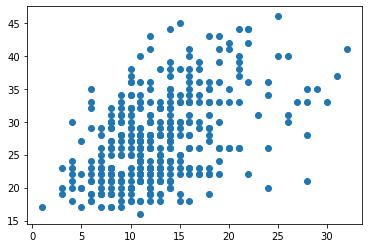

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=new_df_3['mat_dnm'], y=new_df_3['Mother_age'])

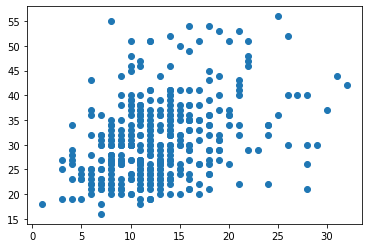

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=new_df_3['mat_dnm'], y=new_df_3['Father_age'])

In [12]:
model = smf.ols(formula = "Mother_age ~ mat_dnm", data = new_df_3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        19:14:51   Log-Likelihood:                -1250.7
No. Observations:                 396   AIC:                             2505.
Df Residuals:                     394   BIC:                             2513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5164      0.770     25.336      0.000      18.002      21.031
mat_dnm        0.6026      0.056     10.772      0.000       0.493       0.713
==============================================================================
Omnibus:                       10.828   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.046
Skew:                           0.385   Prob(JB):                      0.00399
Kurtosis:                       2.723   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model = smf.ols(formula = "Father_age ~ pat_dnm", data = new_df_3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        19:14:51   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0178      0.972      7.220      0.000       5.107       8.929
pat_dnm        0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Queston 8

In [19]:
#make bins the same size 
mat_bins = int(max(new_df_3["mat_dnm"])-min(new_df_3["mat_dnm"])/2)
pat_bins = int(max(new_df_3["pat_dnm"])-min(new_df_3["pat_dnm"])/2)

mat_bins, pat_bins


(31, 102)

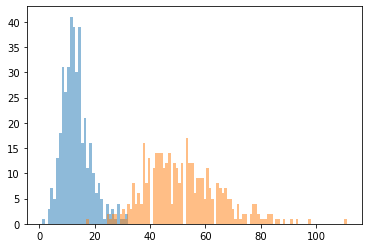

In [20]:
fig, ax = plt.subplots()
ax.hist(new_df_3["mat_dnm"], bins = mat_bins, alpha = 0.5)
ax.hist(new_df_3["pat_dnm"], bins = pat_bins, alpha = 0.5)
plt.show()

# Question 9 stats t test 

In [ ]:
#stats  t test 

# Question 11 

In [ ]:
#poisson regression iss equal to u=exp(a + Bx)= exp(a)exp(Bx)
#import math
#math.exp(3.19 +   0.0024096)
#a is intercept coeffient and B is coefficient of fathers age
#x is fathers age